In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#to protect client's privacy,online sample UCI credit card data used for this demonstration instead

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [5]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.rename(columns={'default.payment.next.month':'default_status'}, inplace=True)

In [7]:
df['sex1']=df['SEX'].map({1:'male', 2:'female'})
df['education1'] = df['EDUCATION'].map({1:'graduate school', 2:'university',3:'high school',
                                      4:'others'})
df['marriage1'] = df['MARRIAGE'].map({1:'married',2:'single',3:'others'})

In [8]:
from matplotlib.gridspec import GridSpec

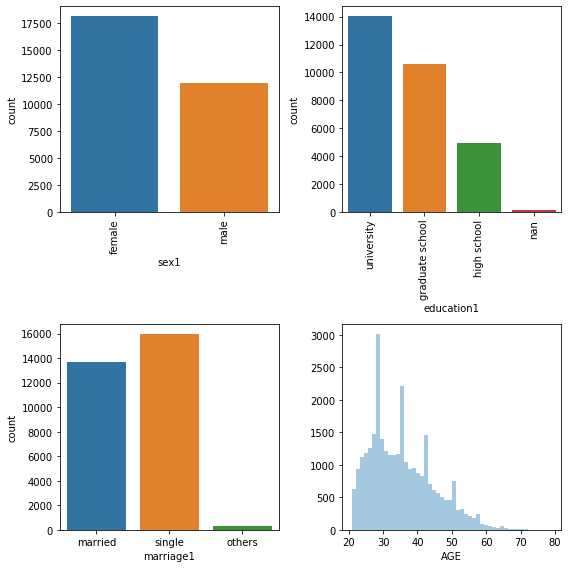

In [9]:
fig = plt.figure(figsize=(8,8))
gd = GridSpec(nrows=2,ncols=2)

ax0 = fig.add_subplot(gd[0,0])
sb.countplot(df['sex1'], ax=ax0)
ax0.set_xticklabels(labels=df['sex1'].unique() , rotation=90)

ax1 = fig.add_subplot(gd[0,1])
sb.countplot(df['education1'], ax=ax1)
ax1.set_xticklabels(labels=df['education1'].unique() , rotation=90)

ax2 =fig.add_subplot(gd[1,0])
sb.countplot(df['marriage1'], ax=ax2)

ax3 = fig.add_subplot(gd[1,1])
sb.distplot(df['AGE'],kde=False, ax=ax3)

fig.tight_layout()
plt.show()


In [10]:
#set PAY variables<0, all to zero
pay_list =['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for p in pay_list:
    df[p]= df[p].apply(lambda x:0 if x<1 else x)

In [11]:
df_cat = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','SEX','EDUCATION','MARRIAGE']]

In [12]:
#dummy variables creation
df_cat_enc =  pd.get_dummies(df_cat, drop_first=True)

In [13]:
df_num = df[['AGE','LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

In [15]:
X = pd.concat([df_num_scaled,df_cat_enc], axis=1)

In [16]:
y =df['default_status']

In [17]:
df['default_status'].value_counts()

0    23364
1     6636
Name: default_status, dtype: int64

In [18]:
#target is unbalanced, target stratification or upsampling/downsampling are need be be performed

In [19]:
#result df
result_df = pd.DataFrame(index=['LogReg','RF','XGB'], columns=['accuracy','precision', 'recall'])

In [20]:
#confusion matrix
def CMatrix(CM):
    dfcon = pd.DataFrame(data=CM,index=['pay','default'], columns=['pay','default'])
    dfcon.index.name ='true'
    dfcon.columns.name='Prediction'
    dfcon.loc['Total'] = dfcon.sum()
    dfcon['Total'] = dfcon.sum(axis=1)
    return dfcon

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify =y)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, confusion_matrix

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)

result_df.loc['LogReg','accuracy']  = accuracy_score(y_test,pred1)
result_df.loc['LogReg','precision']= precision_score(y_test,pred1)
result_df.loc['LogReg','recall']=recall_score(y_test,pred1)

C:\Users\ErandaniD\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
CM1 = confusion_matrix(y_test,pred1)
CMatrix(CM1)

Prediction,pay,default,Total
true,,,
pay,5585,256,5841
default,1110,549,1659
Total,6695,805,7500


#### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)

result_df.loc['RF','accuracy']  = accuracy_score(y_test,pred2)
result_df.loc['RF','precision']= precision_score(y_test,pred2)
result_df.loc['RF','recall']=recall_score(y_test,pred2)

C:\Users\ErandaniD\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
CM2 = confusion_matrix(y_test,pred2)
CMatrix(CM2)

Prediction,pay,default,Total
true,,,
pay,5508,333,5841
default,1099,560,1659
Total,6607,893,7500


#### XGBoost

In [27]:
import xgboost as xgb

model3 = xgb.XGBClassifier(objective='binary:logistic',n_estimators=10)
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)

result_df.loc['XGB','accuracy']  = accuracy_score(y_test,pred3)
result_df.loc['XGB','precision']= precision_score(y_test,pred3)
result_df.loc['XGB','recall']=recall_score(y_test,pred3)

In [28]:
CM3 = confusion_matrix(y_test,pred3)
CMatrix(CM3)

Prediction,pay,default,Total
true,,,
pay,5546,295,5841
default,1047,612,1659
Total,6593,907,7500


In [29]:
result_df 

,accuracy,precision,recall
LogReg,0.817867,0.681988,0.330922
RF,0.809067,0.6271,0.337553
XGB,0.821067,0.674752,0.368897


In [30]:
#since target is unbalnced precision or recall should be optimized instead of accuracy

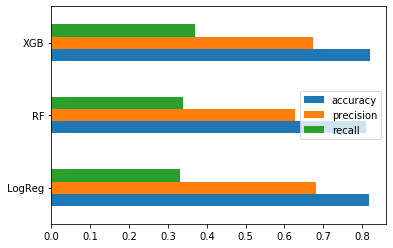

In [31]:
result_df.plot(kind='barh')

In [32]:
precision_lr, recall_lr, threshold_lr = precision_recall_curve(y_true=y_test,
                                        probas_pred=model1.predict_proba(X_test)[:,1])
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_true=y_test,
                                        probas_pred=model2.predict_proba(X_test)[:,1])
precision_xgb, recall_xgb, threshold_xgb = precision_recall_curve(y_true=y_test,
                                        probas_pred=model3.predict_proba(X_test)[:,1])

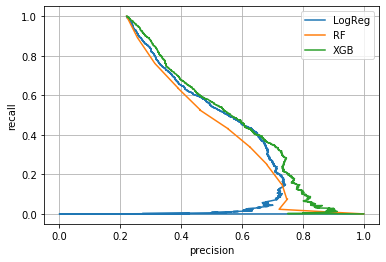

In [33]:
plt.plot(precision_lr,recall_lr, label='LogReg')
plt.plot(precision_rf, recall_rf, label='RF')
plt.plot(precision_xgb, recall_xgb, label='XGB')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.legend()
plt.show()


In [34]:
#out of fitted 3 models XGB gives highest recall against precision; so continue XGB model

In [35]:
#using f-score to calculate optimum threshold
# convert to f score
fscore = (2 * precision_xgb * recall_xgb) / (precision_xgb + recall_xgb)
# locate the index of the largest f score
ix = fscore.argmax()
print('Best Threshold=%f, F-Score=%.3f' % (threshold_xgb[ix], fscore[ix]))

Best Threshold=0.294133, F-Score=0.537


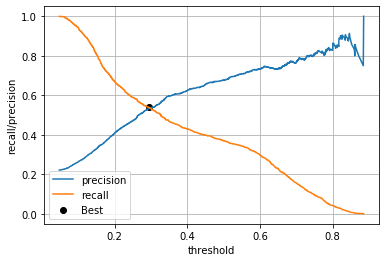

In [36]:
#XGB precision recall curves
#XGB precision recall curves
plt.plot(threshold_xgb,precision_xgb[1:], label='precision')
plt.plot(threshold_xgb,recall_xgb[1:], label='recall')
plt.scatter(threshold_xgb[ix],recall_xgb[ix], marker='o', color='black', label='Best')
plt.xlabel('threshold')
plt.ylabel('recall/precision')

plt.legend()
plt.grid()

In [37]:
predp = model3.predict_proba(X_test)[:,1]

In [38]:
#to achieve optimum precision and recall threshold can be selected as 0.294133
predf = (predp>0.294133).astype(int)

In [39]:
accuracy_score(y_test,predf)

0.7938666666666667

In [40]:
precision_score(y_test,predf)

0.5336509827278142

In [41]:
recall_score(y_test,predf)

0.540084388185654

In [42]:
CMf=confusion_matrix(y_test,predf)
CMatrix(CMf)

Prediction,pay,default,Total
true,,,
pay,5058,783,5841
default,763,896,1659
Total,5821,1679,7500


#### Hyper-parameter tunning - XGB Model

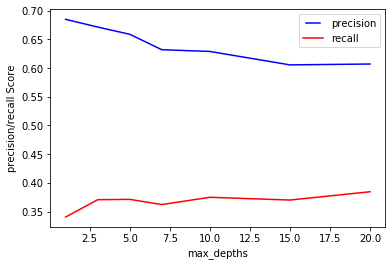

In [46]:
#maximum depth
max_depths = [1,3,5,7,10,15,20]
recall_result = []
precision_result = []

for max_depth in max_depths:
    model = xgb.XGBClassifier(max_depth=max_depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    precision_clf = precision_score(y_test, y_pred)
    recall_clf = recall_score(y_test, y_pred)
    precision_result.append(precision_clf)
    recall_result.append(recall_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, precision_result, 'b', label='precision')
line2, = plt.plot(max_depths, recall_result, 'r', label='recall')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('precision/recall Score')
plt.xlabel('max_depths')
plt.show()

max_depth=3 is taken as optimal

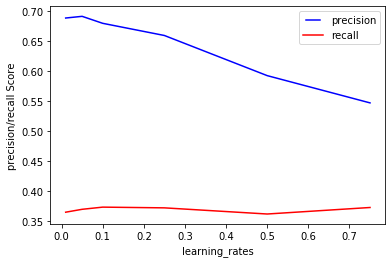

In [51]:
#eta
learning_rates = [0.75 ,0.5, 0.25, 0.1, 0.05, 0.01]

recall_result = []
precision_result = []

for eta in learning_rates:
    model = xgb.XGBClassifier(learning_rate=eta)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    precision_clf = precision_score(y_test, y_pred)
    recall_clf = recall_score(y_test, y_pred)
    precision_result.append(precision_clf)
    recall_result.append(recall_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, precision_result, 'b', label='precision')
line2, = plt.plot(learning_rates, recall_result, 'r', label='recall')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('precision/recall Score')
plt.xlabel('learning_rates')
plt.show()

learning rate=0.1 seems optimal

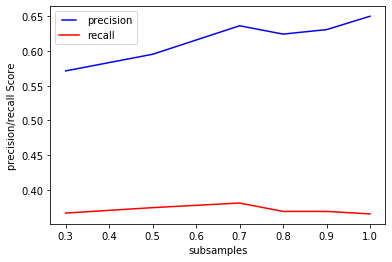

In [53]:
#Subsamples
subsamples = [0.3,0.5,0.7,0.8,0.9,1]
recall_result = []
precision_result = []

for subsample in subsamples:
    model = xgb.XGBClassifier(subsample=subsample)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    precision_clf = precision_score(y_test, y_pred)
    recall_clf = recall_score(y_test, y_pred)
    precision_result.append(precision_clf)
    recall_result.append(recall_clf)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(subsamples, precision_result, 'b', label='precision')
line2, = plt.plot(subsamples, recall_result, 'r', label='recall')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('precision/recall Score')
plt.xlabel('subsamples')
plt.show()

subsample = 0.7 seems optimal

#### Variable Importance XGB model

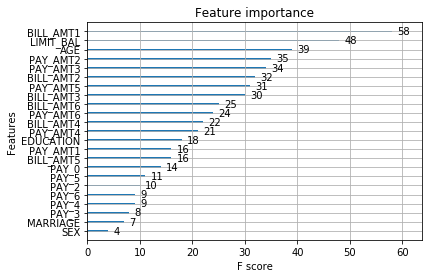

In [56]:
xgb.plot_importance(model3)

Bill amount, credit limit balance, age and recent payment amounts seems to have high impact on the defaulting behavior